# Задача предсказания оттока клиентов Банка


Отток клиентов (англ. churn) — это потеря клиентов, выраженная в
отсутствии покупок или платежей в течение определенного периода
времени. 

Показатель оттока крайне важен для компаний с подписной и транзакционной моделями бизнеса, подразумевающими регулярные платежи в сторону компании. 

Данный показатель зависит от выбранной методики расчета. Существенным параметром является величина периода времени неактивности клиента, чтобы считать данного клиента потерянным для банка. 
Если данный параметр выбрать неверно, то это приведет к искажениям
в оценке и трактовке оттока. 

Базовая формула для расчета оттока имеет следующий вид: 
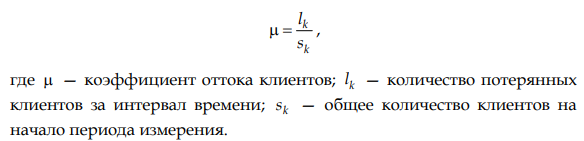

Интервал времени, на котором измеряется отток, должен выбираться с учетом специфики бизнеса (сезонность, стадия жизненного цикла
продукта, является ли данный товар или услуга новыми и т.д.).

Для полноты картины сам по себе коэффициент оттока является
малоинформативным показателем. Важно понимать структуру оттока: 
1. какие сегменты клиентов в первую очередь подвержены оттоку и
почему; 
2. какие факторы чаще всего служат причиной потери клиентов; 
3. какова динамика оттока и тенденции по его структуре. 

Для полного анализа необходимо дать оценку оттока в денежном
выражении. Эта оценка возможна при моделировании денежных потоков, которые получила бы компания, если бы клиент продолжал пользоваться ее услугами. Формула оценки ущерба компании от оттока
клиентов имеет вид
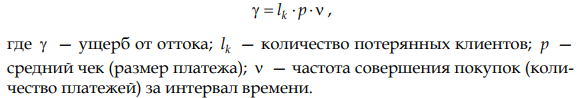

Задача состоит в том, чтобы найти параметры, максимально
влияющие на отток клиентов банка, и создать гипотезу, которая предсказывала бы отток клиентов банка. 
В выборку данных для этой модели войдут 
- возраст, 
- пол
- количество денежных средств на счету клиента. 

<span style="color:red">__Реальная статистика: из 10000 клиентов ушло 2037 человек__</span>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from tkinter import *
from tkinter import ttk

In [4]:
dataset = pd.read_csv(r'Churn_Modelling.csv')
dataset.head(10) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Анализ данных

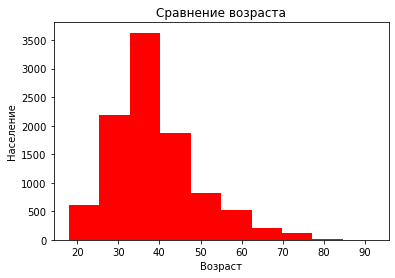

In [71]:
dataset['Age'].value_counts()

plt.hist(x=dataset.Age, bins=10,color='red')
plt.title('Сравнение возраста')
plt.xlabel('Возраст')
plt.ylabel('Население')
plt.show()

In [8]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [3]:
dataset['Geography'].replace('France',1,inplace = True)
dataset['Geography'].replace('Germany',2,inplace = True)
dataset['Geography'].replace('Spain',3,inplace = True)
dataset['Gender'].replace('Female',0,inplace = True)
dataset['Gender'].replace('Male',1,inplace = True)

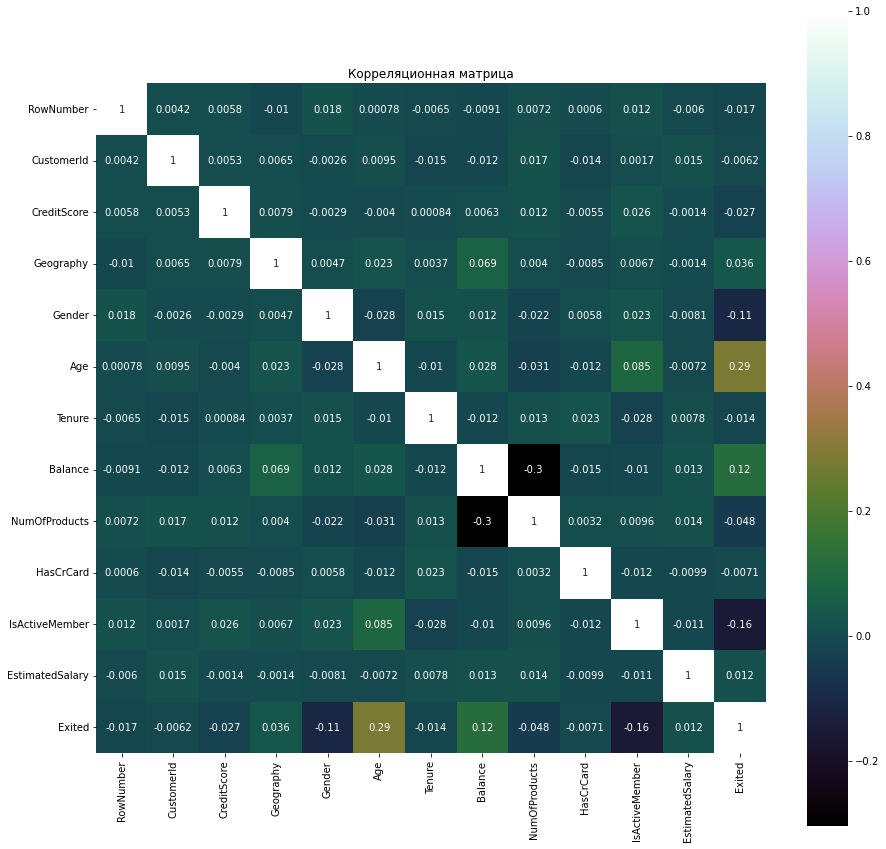

In [34]:
correlation = dataset.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap =
'cubehelix')
plt.title('Корреляционная матрица')
plt.show()

### Предварительная обработка данных

In [5]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [7]:
label_X_country_encoder = LabelEncoder()
X[:, 1] = label_X_country_encoder.fit_transform(X[:, 1])

label_X_gender_encoder = LabelEncoder()
X[:, 2] = label_X_gender_encoder.fit_transform(X[:, 2])

X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [8]:
transform = ColumnTransformer([("countries", OneHotEncoder(), [1])],
                                  remainder="passthrough")  # 1 is the country column
X = transform.fit_transform(X)

X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [12]:
X_test

array([[-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## Моделирование


In [14]:
print('Random Decision Forests:')
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
                                max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                                min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=None, oob_score=False,
                                random_state=None, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_ = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of random decision forests: {round(accuracy_ * 100, 2)}%')

random decision forests:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

[[1527   68]
 [ 195  210]]
Accuracy Score of random decision forests: 86.85%


In [19]:
print('Decision Tree Classifier')
dtree = DecisionTreeClassifier(random_state=None, max_depth=None, criterion='gini', splitter='best',
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features=None, max_leaf_nodes=10, min_impurity_decrease=0.0, class_weight=None)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_ = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of Decision tree Classifier: {round(accuracy_ * 100, 2)}%')

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

[[1520   75]
 [ 204  201]]
Accuracy Score of Decision tree Classifier: 86.05%


In [16]:
print('Passive Aggresive Scassifier')
pac = PassiveAggressiveClassifier(random_state=35)
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_ = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy_ * 100, 2)}%')

Passive Aggresive Scassifier
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1595
           1       0.33      0.37      0.35       405

    accuracy                           0.72      2000
   macro avg       0.58      0.59      0.58      2000
weighted avg       0.73      0.72      0.73      2000

[[1289  306]
 [ 255  150]]
Accuracy Score of Passive Aggresive Scassifier: 71.95%


In [18]:
print('Multi-layer Perceptron Classifier')
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, activation='relu', solver='adam')
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_ = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of MLP Classifier: {round(accuracy_ * 100, 2)}%')

Multi-layer Perceptron Classifier
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.71      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

[[1510   85]
 [ 192  213]]
Accuracy Score of MLP Classifier: 86.15%


## Выводы и сравнения алгоритмов
Ниже представлены результаты сравнения точности предсказаний:


__Результаты точности предсказаний__

- Random Decision Forests: 86.85%
- Decision Tree Classifier: 86.05%
- Passive Aggresive Scassifier: 71.95%
- Multi-layer Perceptron Classifier: 86.15%

Реальная статистика: из 10000 клиентов ушло 2037 человек.
    
__Вывод__: из пяти представленных алгоритмов наилучший результат
показал __Random Decision Forests__ (__случайный лес__). Точность предсказания составляет __86.85%__. 